In [2]:
library("e1071")
attach(iris)
head(iris)


The following objects are masked from iris (pos = 3):

    Petal.Length, Petal.Width, Sepal.Length, Sepal.Width, Species



Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [3]:
x <- subset(iris, select=-Species)
y <- Species

In [5]:
y

setosa 
 setosa 
 setosa 
 setosa 
 setosa 
 setosa 
 setosa 
 setosa 
 setosa 
 setosa 
 setosa 
 setosa 
 setosa 
 setosa 
 setosa 
 setosa 
 setosa 
 setosa 
 setosa 
 setosa 
 setosa 
 setosa 
 setosa 
 setosa 
 setosa 
 setosa 
 setosa 
 setosa 
 setosa 
 setosa 
 setosa 
 setosa 
 setosa 
 setosa 
 setosa 
 setosa 
 setosa 
 setosa 
 setosa 
 setosa 
 setosa 
 setosa 
 setosa 
 setosa 
 setosa 
 setosa 
 setosa 
 setosa 
 setosa 
 setosa 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 versicolor 
 virginica 
 virginica 
 virginica 
 virginica 
 virginica 
 virginica 
 virginica 
 virginica 
 virginica 
 virginica 
 virginica 
 virginica 
 virginica 
 virginica 
 virginica 
 virginica 
 virginica 
 virginica 
 virginica 
 virginica 
 virginica 
 virginica 
 virginica 
 virginica 
 virginica 
 virginica 
 virginica 
 virginica 
 virginica 
 virginica 
 virginica 
 virginica 
 virginica 
 virginica 
 virginica 
 virginica 
 virginica 
 virginica 
 virginica 
 virginica 
 virginica 
 virginica 
 virginica 
 virginica 
 virginica 
 virginica 
 virginica 
 virginica 
 virginica 
 virginica 
 

 
 
 Levels :
 
 
 'setosa' 
 'versicolor' 
 'virginica'

In [6]:
svm_model <- svm(Species ~ ., data=iris)
summary(svm_model)


Call:
svm(formula = Species ~ ., data = iris)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.25 

Number of Support Vectors:  51

 ( 8 22 21 )


Number of Classes:  3 

Levels: 
 setosa versicolor virginica




In [9]:
pred <- predict(svm_model,x)
#pred

table(pred,y)

            y
pred         setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         48         2
  virginica       0          2        48

In [10]:
# Tununig

svm_tune <- tune(svm, train.x=x, train.y=y, 
              kernel="radial", ranges=list(cost=10^(-1:2), gamma=c(.5,1,2)))

print(svm_tune)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1   0.5

- best performance: 0.04 



In [11]:
# After you find the best cost and gamma, you can create svm model again and try to run again
svm_model_after_tune <- svm(Species ~ ., data=iris, kernel="radial", cost=1, gamma=0.5)
summary(svm_model_after_tune)



Call:
svm(formula = Species ~ ., data = iris, kernel = "radial", cost = 1, 
    gamma = 0.5)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.5 

Number of Support Vectors:  59

 ( 11 23 25 )


Number of Classes:  3 

Levels: 
 setosa versicolor virginica




In [12]:
pred <- predict(svm_model_after_tune,x)
table(pred,y)

            y
pred         setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         48         2
  virginica       0          2        48

In [15]:
library(caTools)

# Spliting data into training set and test set
split = sample.split(Species, SplitRatio = .8)
training_set = subset(iris, split == TRUE)
test_set = subset(iris, split == FALSE)

nrow(training_set)

120

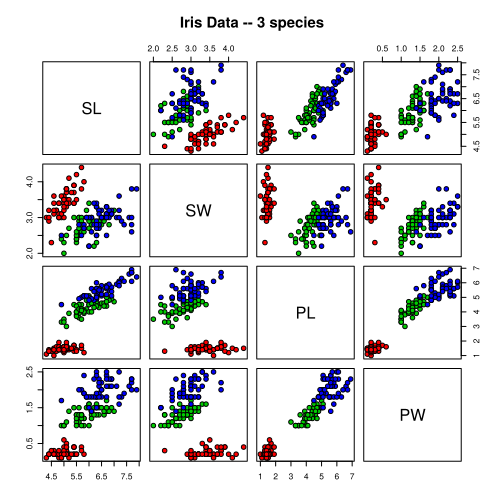

In [65]:
colnames(iris) <- c("SL","SW","PL","PW","Species")

pairs(iris[1:4], main = "Iris Data -- 3 species",
      pch = 21, bg = c("red", "green3", "blue")[unclass(iris$Species)])


In [32]:
# Scaling  -- SCALE - Use inform to students

training_set[,1:4] = scale(training_set[,1:4])
test_set[,1:4] = scale(test_set[,1:4])

classifier1 = svm(formula = Species~., data = training_set, type = 'C-classification', kernel = 'radial')
classifier2 = svm(formula = Species~ Petal.Width + Petal.Length, data = training_set, type = 'C-classification', kernel = 'radial')




In [33]:
classifier1


Call:
svm(formula = Species ~ ., data = training_set, type = "C-classification", 
    kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.25 

Number of Support Vectors:  48


In [34]:
test_pred1 = predict(classifier1, type = 'response', newdata = test_set[-5])
test_pred2 = predict(classifier2, type = 'response', newdata = test_set[-5])

# Making Confusion Matrix
cm1 = table(test_set[,5], test_pred1)
cm2 = table(test_set[,5], test_pred2)
cm1 # Confusion Matrix for all parameters

            test_pred1
             setosa versicolor virginica
  setosa         10          0         0
  versicolor      0          9         1
  virginica       0          1         9

In [79]:
#, test_pred1
library(tm)
library(caret)
confusionMatrix(test_set[,5],positive='TRUE')

Loading required package: lattice


ERROR: Error in is.factor(reference): argument "reference" is missing, with no default


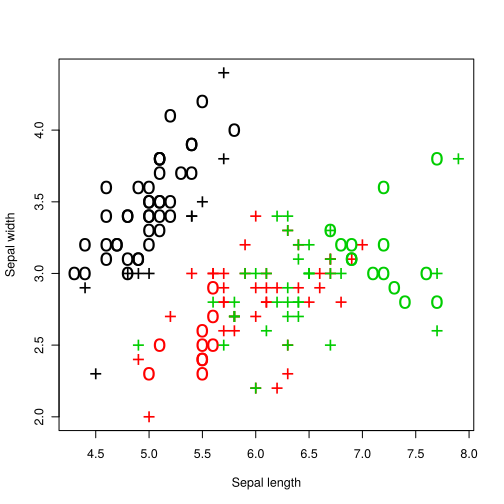

In [90]:
data(iris)
svm.model <- svm(Species ~ Sepal.Length + Sepal.Width, data = iris, kernel = "radial") # linear
# the + are support vectors
plot(iris$Sepal.Length, iris$Sepal.Width, col = as.integer(iris[, 5]), 
     pch = c("o","+")[1:150 %in% svm.model$index + 1], cex = 2, 
     xlab = "Sepal length", ylab = "Sepal width")
#legend(x = 3.37, y=7.5, legend = c("Setosa", "versicolor", "verginica"),fill = c('blue','red','green'))

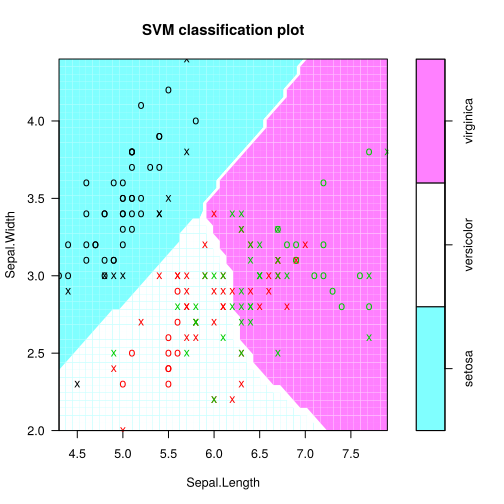

In [89]:
plot(svm.model, iris, Sepal.Width ~ Sepal.Length)

     

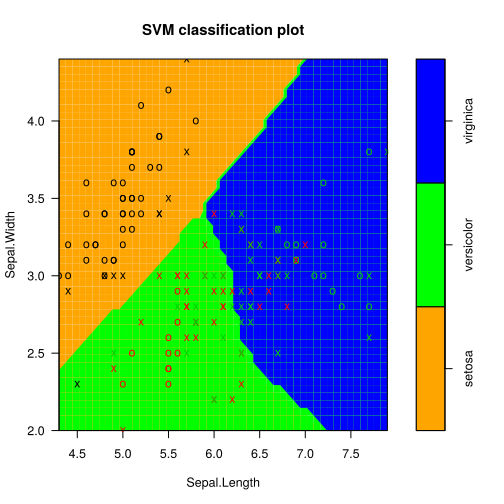

In [50]:

## plot with custom symbols and colors
plot(svm.model, iris, Sepal.Width ~ Sepal.Length, 
      col = c("orange","green","blue")) # showing a 2D slice of the 4D space
     

Sepal.Length,Sepal.Width
-6.09148,7.261557
-10.57444,-1.472430


0.0159838553392381 
 -0.162902739272031 
 -0.0950294494403697

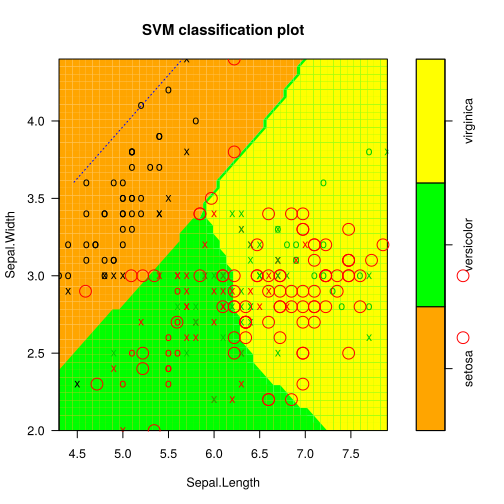

In [59]:
plot(svm.model, iris, Sepal.Width ~ Sepal.Length, 
      col = c("orange","green","yellow")) # showing a 2D slice of the 4D space
points(iris[svm.model$index,c(1,2,3)],col="red",cex=2) # show the support vectors

# get parameters of hiperplane
w <- t(svm.model$coefs) %*% svm.model$SV
b <- -svm.model$rho
w
b
# in this 2D case the hyperplane is the line w[1,1]*x1 + w[1,2]*x2 + b = 0
abline(a=-b/w[1,2], b=-w[1,1]/w[1,2], col="blue", lty=3) # soft margin



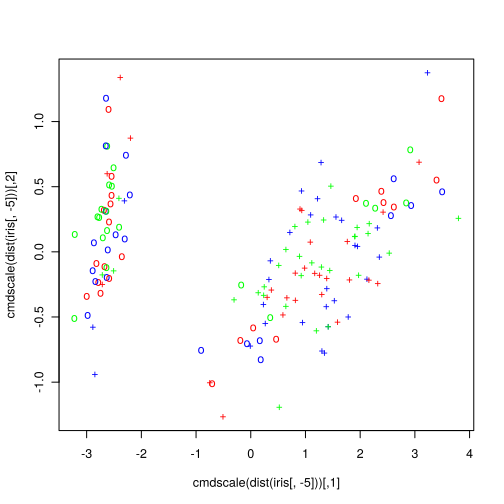

In [76]:
# compute decision values and probabilities:
#pred <- predict(svm.model, x, decision.values = TRUE)
#attr(pred, "decision.values")[1:4,]
svm.model <- svm(Species ~ Sepal.Length + Sepal.Width, data = iris, kernel = "radial") # linear
# visualize (classes by color, SV by crosses):
plot(cmdscale(dist(iris[,-5])),
     col = c("red","green","blue"),
     pch = c("o","+")[1:150 %in% svm.model$index + 1])

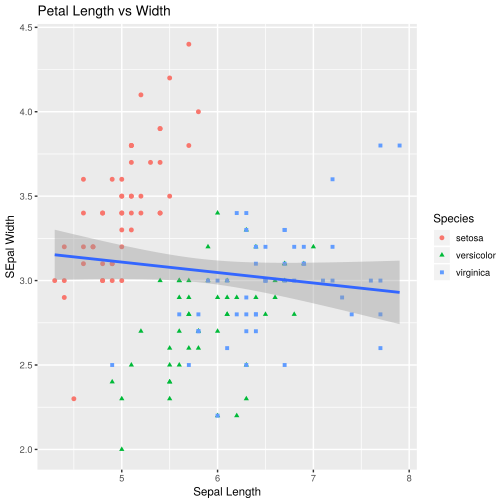

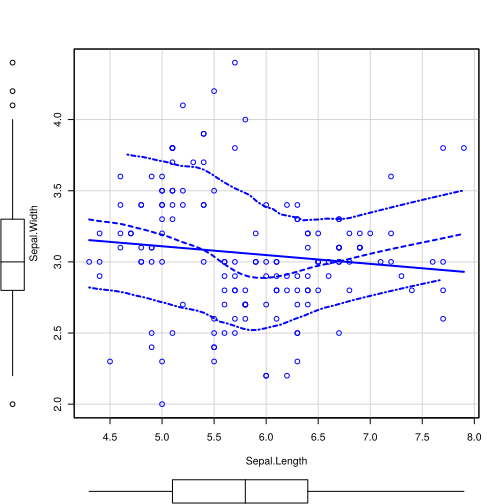

In [83]:
ggplot(data = iris, aes(x =Sepal.Length, y = Sepal.Width))+
  xlab("Sepal Length")+
  ylab("SEpal Width") +
  geom_point(aes(color = Species,shape=Species))+
  geom_smooth(method='lm')+
  ggtitle("Petal Length vs Width")


library(car)
scatterplot(Sepal.Length,Sepal.Width)

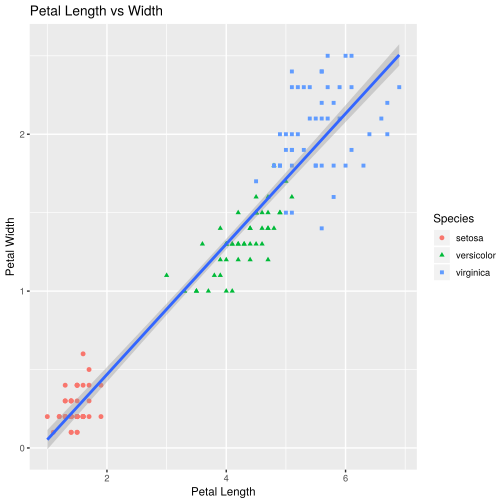

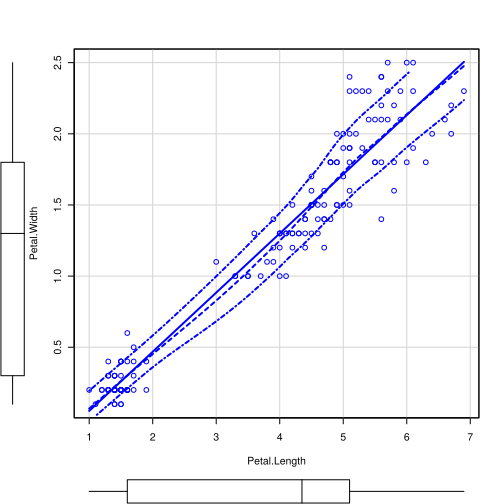

In [84]:
ggplot(data = iris, aes(x =Petal.Length, y = Petal.Width))+
  xlab("Petal Length")+
  ylab("Petal Width") +
  geom_point(aes(color = Species,shape=Species))+
  geom_smooth(method='lm')+
  ggtitle("Petal Length vs Width")


library(car)
scatterplot(Petal.Length,Petal.Width)

In [92]:

library(caret)
# test_pred 1 from pred, test_set data
confusionMatrix(test_pred1, test_set[,5])

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0          9         1
  virginica       0          1         9

Overall Statistics
                                          
               Accuracy : 0.9333          
                 95% CI : (0.7793, 0.9918)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 8.747e-12       
                                          
                  Kappa : 0.9             
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9000           0.9000
Specificity                 1.0000            0.9500           0.9500
Pos Pred Value              1.0000            0.9000           0.9000
Neg Pred Value              1.0000            0.9500           0.9500
Prevalence                  0.3333          